<a href="https://colab.research.google.com/github/aksha1234/Research-project/blob/main/first_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('first-assignment')
jovian.set_colab_id('1kCCoCDfUNcZtvM9SV4nztOdxG-Ulb-Fi')

     |████████████████████████████████| 68 kB 3.2 MB/s 


# first-assignment

Use the "Run" button to execute the code.

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="first-assignment")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/akkikadwe/first-assignment


'https://jovian.ai/akkikadwe/first-assignment'

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

## Importing the data

In [164]:
df=pd.read_excel('/content/e1Detector_gneE3_0_11.xlsx',skiprows=1)

In [165]:
df

,/@xsi:noNamespaceSchemaLocation,/interval/@begin,/interval/@end,/interval/@flow,/interval/@harmonicMeanSpeed,/interval/@id,/interval/@length,/interval/@nVehContrib,/interval/@nVehEntered,/interval/@occupancy,/interval/@speed
0,http://sumo.dlr.de/xsd/det_e1_file.xsd,0,120,0,-1.00,e1Detector_gneE3_0_1,-1,0,0,0.00,-1.00
1,http://sumo.dlr.de/xsd/det_e1_file.xsd,120,240,360,11.33,e1Detector_gneE3_0_1,5,12,12,4.41,11.39
2,http://sumo.dlr.de/xsd/det_e1_file.xsd,240,360,630,11.48,e1Detector_gneE3_0_1,5,21,21,7.62,11.54
3,http://sumo.dlr.de/xsd/det_e1_file.xsd,360,480,570,5.18,e1Detector_gneE3_0_1,5,19,20,22.64,10.48
4,http://sumo.dlr.de/xsd/det_e1_file.xsd,480,600,270,0.50,e1Detector_gneE3_0_1,5,9,9,78.39,2.45
...,...,...,...,...,...,...,...,...,...,...,...
60,http://sumo.dlr.de/xsd/det_e1_file.xsd,7200,7320,210,0.29,e1Detector_gneE3_0_1,5,7,7,82.37,0.79
61,http://sumo.dlr.de/xsd/det_e1_file.xsd,7320,7440,180,0.29,e1Detector_gneE3_0_1,5,6,6,84.03,0.72
62,http://sumo.dlr.de/xsd/det_e1_file.xsd,7440,7560,390,0.71,e1Detector_gneE3_0_1,5,13,13,71.17,1.41
63,http://sumo.dlr.de/xsd/det_e1_file.xsd,7560,7680,960,5.20,e1Detector_gneE3_0_1,5,32,31,25.07,5.52


In [166]:
df=df.drop(index=[0,64],axis=0)

## Cleaning the Table

In [167]:
cols=df.columns.tolist()

In [168]:
imp_cols=cols[1:5]
imp_cols

['/interval/@begin',
 '/interval/@end',
 '/interval/@flow',
 '/interval/@harmonicMeanSpeed']

In [169]:
df=df[imp_cols]

In [170]:
df.columns=['begin','end','flow','speed']

In [171]:
df.head()

,begin,end,flow,speed
1,120,240,360,11.33
2,240,360,630,11.48
3,360,480,570,5.18
4,480,600,270,0.50
5,600,720,240,0.41


In [172]:
df['density']=df['flow']/df['speed']

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline


In [174]:
matplotlib.rcParams['figure.figsize']=(15,15)

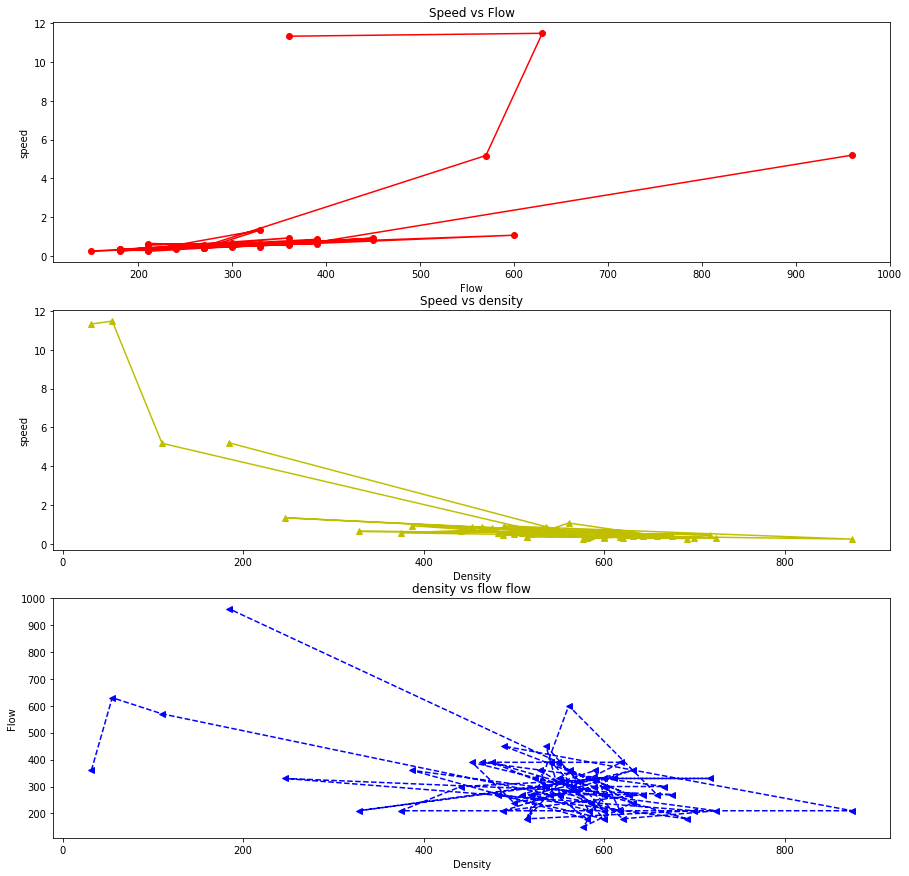

In [175]:
# Initialise the subplot function using number of rows and columns

figure, axis = plt.subplots(3, 1)
  
# For speed-densiity
axis[0].plot(df.flow,df.speed,'ro-')
axis[0].set_title("Speed vs Flow")
axis[0].set_xlabel("Flow")
axis[0].set_ylabel("speed")
  
# For Cosine Function
axis[1].plot(df.density, df.speed,'y^-')
axis[1].set_title("Speed vs density")
axis[1].set_xlabel("Density")
axis[1].set_ylabel("speed")
  
# For Desjity vf flow
axis[2].plot(df.density,df.flow,'b<--')
axis[2].set_title("density vs flow flow")
axis[2].set_xlabel("Density")
axis[2].set_ylabel("Flow")

plt.savefig('pic.jpg')    
# Combine all the operations and display
plt.show()

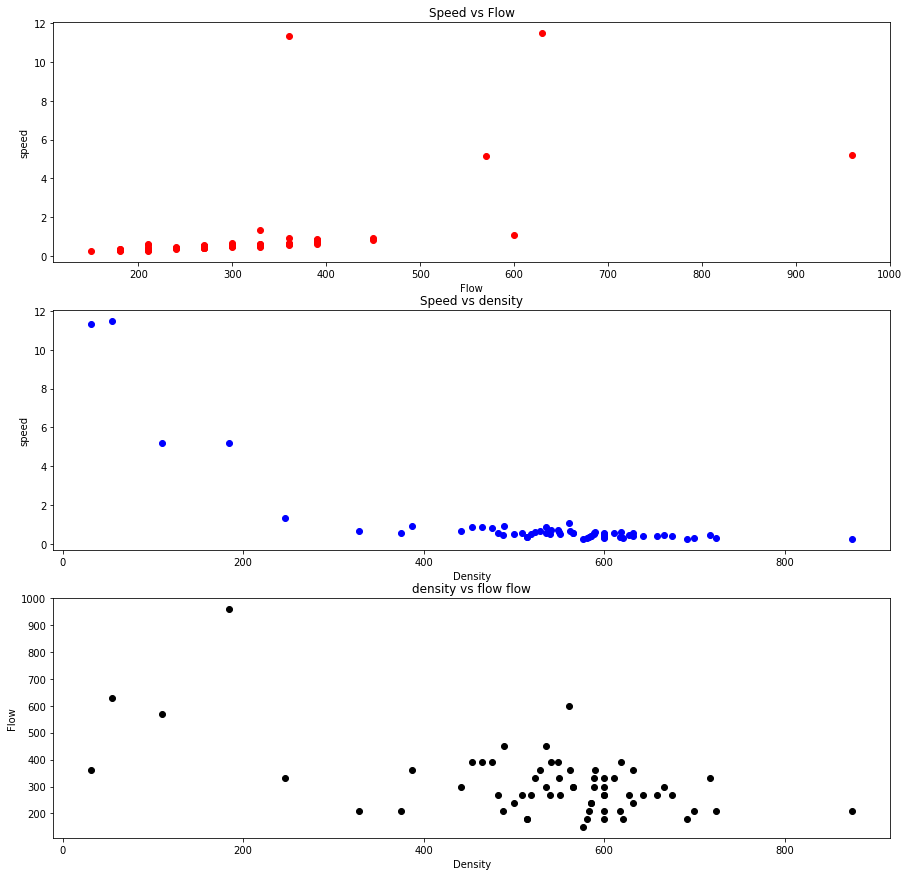

In [177]:
# Initialise the subplot function using number of rows and columns

figure, axis = plt.subplots(3, 1)
  
# For speed-densiity
axis[0].scatter(df.flow,df.speed,c='red')
axis[0].set_title("Speed vs Flow")
axis[0].set_xlabel("Flow")
axis[0].set_ylabel("speed")
  
# For Cosine Function
axis[1].scatter(df.density, df.speed,c='blue')
axis[1].set_title("Speed vs density")
axis[1].set_xlabel("Density")
axis[1].set_ylabel("speed")
  
# For Desjity vf flow
axis[2].scatter(df.density,df.flow,c='black')
axis[2].set_title("density vs flow flow")
axis[2].set_xlabel("Density")
axis[2].set_ylabel("Flow")

plt.savefig('pic.jpg')    
# Combine all the operations and display
plt.show()

In [178]:
import numpy as np
from scipy.optimize import curve_fit

x = df.density
y = df.flow

def fit_func(x, a, b,c):
    return a*pow(x,2) + b*x+c

params = curve_fit(fit_func, x, y)
[a,b,c]=params[0]

In [179]:
params

(array([ 3.59693134e-04, -7.66685636e-01,  6.10463274e+02]),
 array([[ 1.35102526e-07, -1.13327569e-04,  1.89762828e-02],
        [-1.13327569e-04,  1.03553787e-01, -2.04563760e+01],
        [ 1.89762828e-02, -2.04563760e+01,  5.27972901e+03]]))

In [180]:
predict=[]
for val in df.density:
  predict.append(a*pow(val,2)+b*val+c)


In [181]:
x=np.array(df.density)
y=np.array(df.flow)

In [182]:
import numpy as np
from scipy.interpolate import interpolate
import matplotlib.pyplot as plt 


In [188]:
f=interpolate.interp1d(x,y,kind='linear')

In [189]:
X_=np.linspace(x.min(),x.max(),2000)
Y_=f(X_)

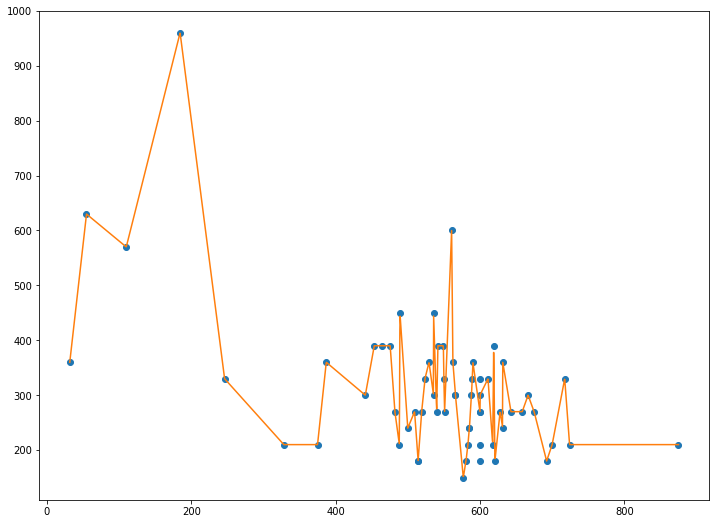

In [190]:
plt.figure(figsize=(12,9))
plt.plot(x, y, 'o', X_, Y_, '-')
plt.show()

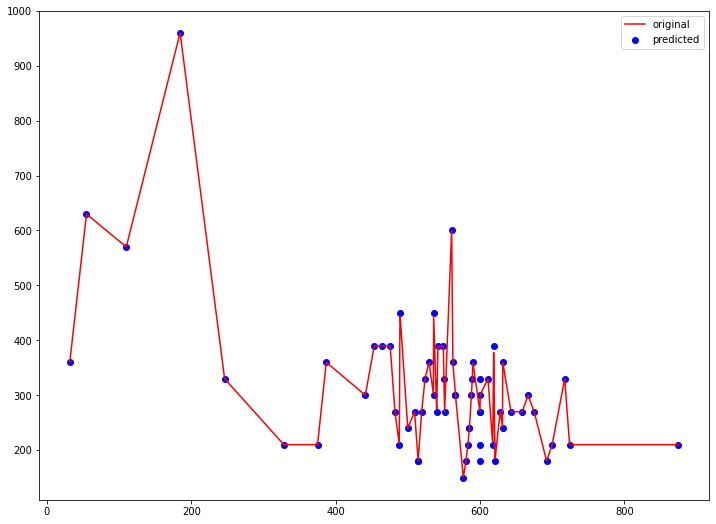

In [192]:
plt.figure(figsize=(12,9))
plt.plot(X_,Y_,color='red')
plt.scatter(x,y,c='blue')
plt.legend(['original','predicted']);

In [194]:
np.polyfit(x, y, 2)

array([ 3.59693029e-04, -7.66685549e-01,  6.10463259e+02])

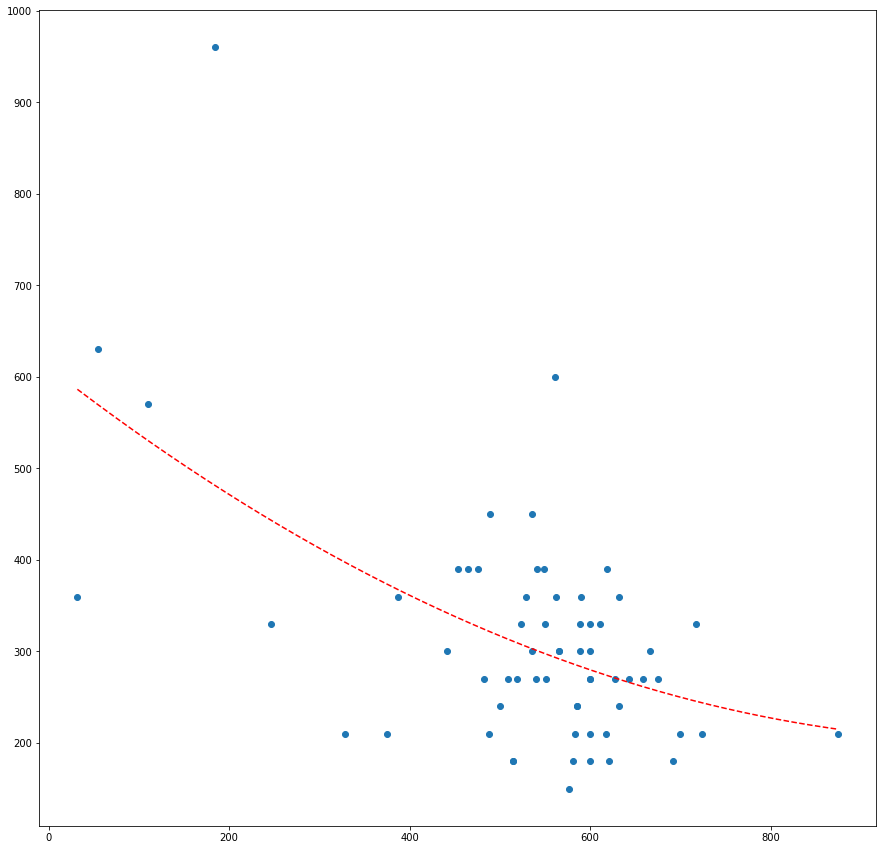

In [193]:
model = np.poly1d(np.polyfit(x, y, 2))

#define scatterplot
plt.scatter(x, y)

#add fitted polynomial curve to scatterplot
plt.plot(X_, model(X_), '--', color='red')
plt.show()

In [ ]:
jovian.commit()